In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Load dataset

In [55]:
df = pd.read_csv("preped_churn_data.csv")

df.sample(10)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_to_MonthlyCharges_ratio,customerID
2107,33,Yes,Month-to-month,Electronic check,93.35,3092.00,No,33.122657,2108
2138,54,Yes,Two year,Bank transfer (automatic),69.95,3871.85,No,55.351680,2139
2006,5,Yes,Month-to-month,Electronic check,47.15,223.15,Yes,4.732768,2007
5117,66,No,Two year,Bank transfer (automatic),61.35,4193.40,No,68.352078,5118
1568,11,Yes,Month-to-month,Electronic check,111.40,1183.05,No,10.619838,1569
838,36,Yes,Month-to-month,Credit card (automatic),79.20,2854.95,No,36.047348,839
6100,29,Yes,Month-to-month,Bank transfer (automatic),99.05,2952.85,Yes,29.811711,6101
4170,72,Yes,Two year,Bank transfer (automatic),115.15,8349.45,No,72.509336,4171
4209,44,Yes,Month-to-month,Bank transfer (automatic),54.90,2549.10,No,46.431694,4210
6556,6,Yes,One year,Credit card (automatic),19.00,105.50,No,5.552632,6557


## Convert categorical columns to numeric

In [56]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_to_MonthlyCharges_ratio,customerID
0,1,0,Month-to-month,Electronic check,29.85,29.85,0,1.000000,1
1,34,1,One year,Mailed check,56.95,1889.50,0,33.178227,2
2,2,1,Month-to-month,Mailed check,53.85,108.15,1,2.008357,3
3,45,0,One year,Bank transfer (automatic),42.30,1840.75,0,43.516548,4
4,2,1,Month-to-month,Electronic check,70.70,151.65,1,2.144979,5
...,...,...,...,...,...,...,...,...,...
7038,24,1,One year,Mailed check,84.80,1990.50,0,23.472877,7039
7039,72,1,One year,Credit card (automatic),103.20,7362.90,0,71.345930,7040
7040,11,0,Month-to-month,Electronic check,29.60,346.45,0,11.704392,7041
7041,4,1,Month-to-month,Mailed check,74.40,306.60,1,4.120968,7042


## Generating dummies

In [57]:
PM_dummies = pd.get_dummies(df['PaymentMethod'], prefix='PaymentMethod')
C_dummies = pd.get_dummies(df['Contract'], prefix='Contract')

df = pd.concat([df, PM_dummies, C_dummies], axis=1)

df = df.loc[:, ~df.columns.duplicated()]

df.head(5)


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_to_MonthlyCharges_ratio,customerID,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,Month-to-month,Electronic check,29.85,29.85,0,1.000000,1,False,False,True,False,True,False,False
1,34,1,One year,Mailed check,56.95,1889.50,0,33.178227,2,False,False,False,True,False,True,False
2,2,1,Month-to-month,Mailed check,53.85,108.15,1,2.008357,3,False,False,False,True,True,False,False
3,45,0,One year,Bank transfer (automatic),42.30,1840.75,0,43.516548,4,True,False,False,False,False,True,False
4,2,1,Month-to-month,Electronic check,70.70,151.65,1,2.144979,5,False,False,True,False,True,False,False


In [65]:
dummies = ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PaymentMethod_Credit card (automatic)']

for column in dummies:
    df[column] = pd.factorize(df[column])[0]

df.sample(5)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_to_MonthlyCharges_ratio,customerID,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
6261,62,1,Two year,Bank transfer (automatic),20.45,1297.35,0,63.440098,6262,1,0,1,0,1,0,1
1328,23,1,Month-to-month,Electronic check,54.25,1221.55,0,22.517051,1329,0,0,0,0,0,0,0
6694,8,1,Two year,Credit card (automatic),76.15,645.80,0,8.480630,6695,0,1,1,0,1,0,1
4197,22,1,Month-to-month,Electronic check,84.75,1816.75,0,21.436578,4198,0,0,0,0,0,0,0
2169,62,1,Two year,Mailed check,81.00,4985.90,0,61.554321,2170,0,0,1,1,1,0,1


## Dropping unneeded columns

In [67]:
df = df.drop(['PaymentMethod', 'Contract', 'customerID'], axis=1)
df

,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,TotalCharges_to_MonthlyCharges_ratio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,29.85,29.85,0,1.000000,0,0,0,0,0,0,0
1,34,1,56.95,1889.50,0,33.178227,0,0,1,1,1,1,0
2,2,1,53.85,108.15,1,2.008357,0,0,1,1,0,0,0
3,45,0,42.30,1840.75,0,43.516548,1,0,1,0,1,1,0
4,2,1,70.70,151.65,1,2.144979,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,84.80,1990.50,0,23.472877,0,0,1,1,1,1,0
7039,72,1,103.20,7362.90,0,71.345930,0,1,1,0,1,1,0
7040,11,0,29.60,346.45,0,11.704392,0,0,0,0,0,0,0
7041,4,1,74.40,306.60,1,4.120968,0,0,1,1,0,0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   PhoneService                             7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   Churn                                    7043 non-null   int64  
 5   TotalCharges_to_MonthlyCharges_ratio     7043 non-null   float64
 6   PaymentMethod_Bank transfer (automatic)  7043 non-null   int64  
 7   PaymentMethod_Credit card (automatic)    7043 non-null   int64  
 8   PaymentMethod_Electronic check           7043 non-null   int64  
 9   PaymentMethod_Mailed check               7043 non-null   int64  
 10  Contract_Month-to-month                  7043 no

In [60]:
df.isna().sum()

tenure                                     0
PhoneService                               0
Contract                                   0
PaymentMethod                              0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
TotalCharges_to_MonthlyCharges_ratio       0
customerID                                 0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
dtype: int64

## Modelling

## Split data into features (X) and target (y)

In [69]:
X = df.drop('Churn', axis=1)
y = df['Churn']

## Split into training and testing sets

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
num_rows, num_columns = len(X_train), X_train.shape[1]
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 5634
Number of columns: 12


In [72]:
y_train.shape

(5634,)

In [73]:
X_test.shape

(1409, 12)

In [74]:
y_test.shape

(1409,)

## Train Model

In [75]:
# Create and train the Linear Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [76]:
print(lr_model.score(X_train, y_train))
print(lr_model.score(X_test, y_test))

0.7903798367057153
0.8048261178140526


The accuracy score on the training set is 0.79 while the accuracy score on the test set is approximately 0.70, indicating that the model performs less accurately on test data compared to the training data.

## Make predictions on the test data

In [77]:
y_pred = lr_model.predict(X_test)

## Evaluation

In [84]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


## Evaluation Results

In [85]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n',classification_report(y_test, y_pred))

Accuracy: 0.80
Confusion Matrix:
[[929 107]
 [168 205]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.55      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



## Confusion Matrix

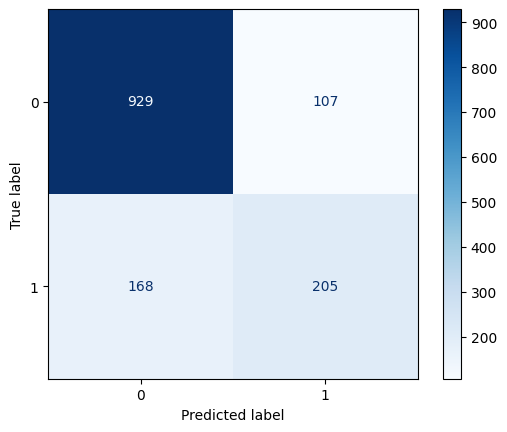

In [86]:
cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix shows true negatives (TN, or a prediction of 929 when the true label is 0), false negatives (FN, prediction=0 true=1) of 168, true positives (TP, prediction=true=1) of 205 and false positives (FP, prediction=1 true=0) of 107. From this, we can get an idea of how the algorithm is performing and compare multiple models. 


## Interpretation

True negatives (TN): The model correctly predicted 929 instances where the true label is 0 (no churn). This signifies the number of customers who were correctly identified as not churning. These are satisfied customers who were retained by the company.

False negatives (FN): The model incorrectly predicted 0 (no churn) when the true label is 1 (churn) in 168 instances. This signifies the number of customers who were incorrectly identified as not churning, leading to missed opportunities for intervention. These are customers who churned despite the model predicting otherwise.

True positives (TP): The model correctly predicted 205 instances where the true label is 1 (churn). This signifies the number of customers who were correctly identified as churning. These are customers who actually churned, and the model successfully flagged them for attention or intervention.

False positives (FP): The model incorrectly predicted 1 (churn) when the true label is 0 (no churn) in 107 instances. This signifies the number of customers who were incorrectly identified as churning, leading to unnecessary intervention or resources being allocated to customers who were not at risk of churning.


## Comparison with No information rate

In [87]:
no_info_rate = max(y_train.value_counts(normalize=True))
print(f'No Information Rate: {no_info_rate}')

No Information Rate: 0.7344692935747249


**No-Information Rate (0.734)**

This rate serves as a baseline metric, indicating the accuracy achieved by always predicting the majority class (i.e., No churn).

## Fine tuning the model

In [88]:
lr_model.predict_proba(X_test)

array([[0.44008218, 0.55991782],
       [0.94083688, 0.05916312],
       [0.99605303, 0.00394697],
       ...,
       [0.94430226, 0.05569774],
       [0.98859175, 0.01140825],
       [0.54155396, 0.45844604]])

In [89]:
lr_model.predict(X_test)[:15]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

he result is an array of binary values (0 or 1), where each value represents the predicted class for a specific instance in the test set. For binary classification problems like predicting churn (1 or 0), 0 represents one class - no churn - and 1 represents the other class - churn.

In [90]:
(lr_model.predict_proba(X_test)[:10, 1] > 0.5).astype('int')

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

A boolean array indicating whether the predicted probability of class 1 (positive class) for each sample in the first 10 rows of the test set is greater than 0.5. The .astype('int') method then converts these boolean values to integers, where True becomes 1 and False becomes 0.

So, the resulting array [0, 1, 1, 0, 0, 0, 1, 0, 0, 1] corresponds to the binary predictions (0 or 1) for the first 10 samples in the test set based on the threshold of 0.3. A value of 1 indicates that the predicted probability of belonging to class 1 is greater than 0.3, while a value of 0 indicates that it is not.

## Using least threshold

In [91]:
predictions_lt = (lr_model.predict_proba(X_test)[:10, 1] > 0.15).astype('int')
predictions_lt

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

## Accuracy and TP rate

In [92]:
predictions_lt = (lr_model.predict_proba(X_test)[:, 1] > 0.15).astype('int')
print(accuracy_score(y_test, predictions_lt))

0.652235628105039


The accuracy score of approximately 65.22% signifies the overall proportion of correct predictions made by the model on the test set. Specifically, it indicates that:

Out of all the samples in the test set, approximately 65.22% of them were correctly classified by the model.

The model's predictions matched the true labels for approximately 65.22% of the samples in the test set.

In [93]:
tn, fp, fn, tp  = confusion_matrix(y_test, predictions_lt).flatten()
print(tp / (tp + fn))

0.9463806970509383


The true positive rate (TPR), also known as sensitivity or recall, for a binary classification model is calculated.

tp represents the number of true positives (correctly predicted positive instances).

fn represents the number of false negatives (actual positive instances incorrectly predicted as negative).

The formula (tp / (tp + fn)) calculates the true positive rate, which is the ratio of correctly predicted positive instances to the total actual positive instances.

The true positive rate is approximately 0.9464, indicating that the model correctly predicted around 94.64% of the positive instances in the test set.

In [94]:
lr_model.coef_

array([[-1.80700392, -0.84090054,  2.47241881,  1.48021476, -1.79273781,
        -0.06965429, -0.13987485, -0.3897276 , -0.18019845, -0.95531267,
         0.01075943, -0.9660721 ]])

<Axes: >

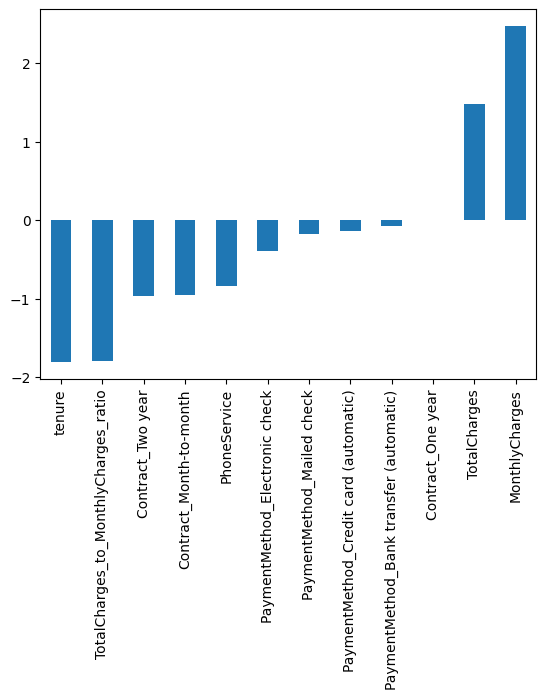

In [95]:
coef_df = pd.DataFrame(data=lr_model.coef_, columns=X.columns)

coef_df.T.sort_values(by=0).plot.bar(legend=False)


## Interpretation

The plot visualizes the coefficients for each feature in a bar chart format.

Features with positive coefficients are represented by bars pointing upwards, while features with negative coefficients are represented by bars pointing downwards.

The length of each bar indicates the magnitude of the coefficient, representing the strength of the association with the target variable.

Features with longer bars (either positive or negative) such as MonthlyCharges and tenure have a stronger influence on the model's predictions.

Those with positive coefficients - MonthlyCharges and TotalCharges - have a positive impact on the likelihood of churn, while features with negative coefficients (downward bars) have a negative impact.

The plot provides insights into which features are most influential in predicting churn, allowing stakeholders to prioritize and focus on key factors affecting customer churn.

The coefficients and the plot help in understanding the relative importance of different features in predicting churn, guiding decision-making processes aimed at reducing churn rates and improving customer retention strategies.

## Advanced Section

## Comparison with other ML models

In [99]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [101]:
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

0.9941427050053249
0.7849538679914834


In [103]:
# Evaluate RFC model
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy of KNN: {accuracy_rf}")

Accuracy of KNN: 0.7849538679914834


## Using SVC

In [100]:
svc_model = SVC(kernel='linear', C=1)
svc_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [104]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))


0.7875399361022364
0.8005677785663591


In [105]:
# Evaluate SVC model
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f"Accuracy of SVC: {accuracy_svc}")

Accuracy of SVC: 0.8005677785663591


## Plot Confusion matrix

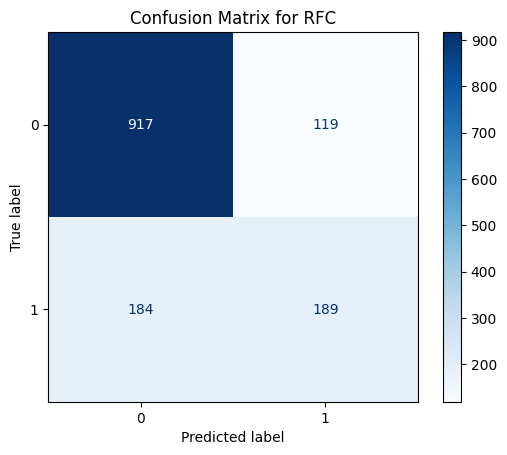

In [107]:
# Confusion Matrix for RFC
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for RFC")
plt.show()

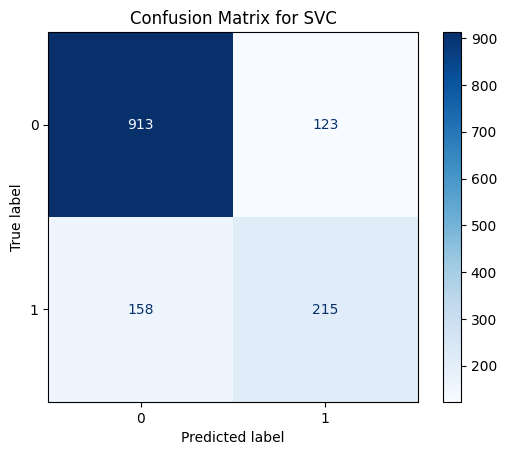

In [108]:
# Confusion Matrix for SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc_model.classes_)
disp_svc.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVC")
plt.show()

## Hyperparameter tuning

In [109]:
# Logistic Regression
lr_params = {'max_iter': [2000, 4000, 6000]}
lr_model = LogisticRegression()
lr_grid = GridSearchCV(lr_model, param_grid=lr_params, cv=3, scoring='accuracy')
lr_grid.fit(X_train, y_train)

# Random Forest Classifier (RFC)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(rf_model, param_grid=rf_params, cv=3, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Support Vector Classifier (SVC)
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc_model = SVC(probability=True)
svc_grid = GridSearchCV(svc_model, param_grid=svc_params, cv=3, scoring='accuracy')
svc_grid.fit(X_train, y_train)

# Calculate test accuracies
lr_accuracy = accuracy_score(y_test, lr_grid.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf_grid.predict(X_test))
svc_accuracy = accuracy_score(y_test, svc_grid.predict(X_test))

# Display best parameters and accuracy for each model
print("Logistic Regression - Best Parameters:", lr_grid.best_params_)
print("Logistic Regression - Test Accuracy:", lr_accuracy)

print("Random Forest Classifier - Best Parameters:", rf_grid.best_params_)
print("Random Forest Classifier - Test Accuracy:", rf_accuracy)

print("Support Vector Classifier - Best Parameters:", svc_grid.best_params_)
print("Support Vector Classifier - Test Accuracy:", svc_accuracy)


Logistic Regression - Best Parameters: {'max_iter': 2000}
Logistic Regression - Test Accuracy: 0.8048261178140526
Random Forest Classifier - Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Random Forest Classifier - Test Accuracy: 0.808374733853797
Support Vector Classifier - Best Parameters: {'C': 1, 'kernel': 'linear'}
Support Vector Classifier - Test Accuracy: 0.8005677785663591


The results showcase the outcome of hyperparameter tuning and testing for three different machine learning models: Logistic Regression, Random Forest Classifier, and Support Vector Classifier (SVC). 

For Logistic Regression, the best parameter configuration was found to be {'max_iter': 2000}, leading to a test accuracy of approximately 80.5%. 

The Random Forest Classifier, with optimized parameters {'max_depth': 10, 'n_estimators': 200}, exhibited a test accuracy of around 80.8%. 

Lastly, the Support Vector Classifier achieved the best performance with parameters {'C': 1, 'kernel': 'linear'}, resulting in a test accuracy of approximately 80.1%. These findings provide insights into the effectiveness of each model and their respective configurations in making accurate predictions on the test set. The test accuracies are crucial metrics, indicating the models' ability to generalize well to unseen data.

## Determine best model

In [110]:
model_accuracies = {
    'Logistic Regression': lr_accuracy,
    'RFC': rf_accuracy,
    'Support Vector Classifier': svc_accuracy
}

best_model = max(model_accuracies, key=model_accuracies.get)

print(f"The best model is: {best_model} with test accuracy {model_accuracies[best_model]:.3f}")

The best model is: RFC with test accuracy 0.808


## Summary

Commencing with data cleaning and exploration, we handled non-numeric columns and transformed features to ensure a clean, representative dataset. Feature engineering added depth to the analysis, creating new features and transforming existing ones. After preprocessing the data, we delved into selecting and training various machine learning models, including Random Forest Classifier, LogisticRegression and Support Vector Classifier. 

Hyperparameter tuning refined the models, optimizing their performance. Rigorous evaluation on the test set provided a clear picture of model generalization. We explored feature importance through visualizations like bar charts.  

Finally, we determined the best-performing model based on test accuracies - which was RFC, completing an approach to building and interpreting a robust machine learning solution.

# Deployment

## API Integration
   
The model can be deployed as an API (Application Programming Interface), allowing seamless communication between the customer management system and the predictive model.

Deploying the churn prediction model as an API serves as a strategic move for real-time decision-making within the customer management system. This integration facilitates continuous communication between the predictive model and the customer data, allowing for swift predictions of churn probability scores. By embedding the model into the existing customer management system, the API empowers the system to automatically assess the likelihood of churn for individual customers based on their historical interactions and present behavior.

The integration opens avenues for customer engagement, as customer service representatives can utilize the churn predictions to identify and reach out to customers at risk of leaving. This enables personalized retention efforts, such as tailored offers or issue resolutions, fostering a more responsive and customer-centric approach.


Beyond customer retention, the model's insights also contribute to strategic business decisions. The correlations between specific features or services and customer retention highlighted by the model can inform product development strategies. This, in turn, assists in refining existing offerings or introducing new features that align with customer preferences, ultimately enhancing the overall customer experience.